# Milestones 2

---

## Introduction

> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

### Dataset

Dataset CIFAR-10 terdiri dari 60.000 gambar berwarna 32x32 dalam 10 kelas, dengan 6000 gambar per kelas. Ada 50000 gambar pelatihan dan 10.000 gambar uji.

Dataset dibagi menjadi lima batch pelatihan dan satu batch pengujian, masing-masing dengan 10.000 gambar. Kumpulan tes berisi tepat 1000 gambar yang dipilih secara acak dari setiap kelas. Kumpulan pelatihan berisi gambar yang tersisa dalam urutan acak, tetapi beberapa kumpulan pelatihan mungkin berisi lebih banyak gambar dari satu kelas daripada yang lain. Di antara mereka, kumpulan pelatihan berisi tepat 5000 gambar dari setiap kelas.

Dataset dapat dilihat di [link ini](https://www.cs.toronto.edu/~kriz/cifar.html).

Berikut adalah kelas dalam dataset:

    * 0: airplane
    * 1: automobile
    * 2: bird
    * 3: cat
    * 4: deer
    * 5: dog
    * 6: frog
    * 7: horse
    * 8: ship
    * 9: truck

### Objectives

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Import Libraries

Pada milestone 2 ini akan menggunakan library **warnings**, **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Tensorflow**, **Keras**, **Pickle** dan **Scikit-Learn**.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

## Data Loading

Di bawah ini, saya meng-unzip file .tar.gz menggunakan unpickle.

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dicts = pickle.load(fo, encoding='bytes')
    return dicts

In [3]:
data1 = unpickle('cifar-10-batches-py/data_batch_1')
data2 = unpickle('cifar-10-batches-py/data_batch_2')
data3 = unpickle('cifar-10-batches-py/data_batch_3')
data4 = unpickle('cifar-10-batches-py/data_batch_4')
data5 = unpickle('cifar-10-batches-py/data_batch_5')
test = unpickle('cifar-10-batches-py/test_batch')
class_names_dict = unpickle('cifar-10-batches-py/batches.meta')

### Data Characteristics

In [4]:
dataset = np.concatenate([data1[b'data'], data2[b'data'], data3[b'data'], data4[b'data'], data5[b'data']], axis=0)
labels = np.concatenate([data1[b'labels'], data2[b'labels'], data3[b'labels'], data4[b'labels'], data5[b'labels']], axis=0)

dataset = dataset.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype('float32')

In [5]:
dataset.shape

(50000, 32, 32, 3)

Diketahui dimensi pada dataset adalah 50000 gambar, 32x32 pixel, dan masing-masing gambar berwarna.

In [6]:
test_set = test[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype('float32')
test_labels = test[b'labels']

In [7]:
test_set.shape

(10000, 32, 32, 3)

Diketahui dimensi pada test set adalah 1000 gambar, 32x32 pixel, dan masing-masing gambar berwarna.

In [8]:
datas1 = data1[b'data']
datas2 = data2[b'data']
datas3 = data3[b'data']
datas4 = data4[b'data']
datas5 = data5[b'data']
label1 = data1[b'labels']
label2 = data2[b'labels']
label3 = data3[b'labels']
label4 = data4[b'labels']
label5 = data5[b'labels']
test_data = test[b'data']
test_label = test[b'labels']

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
train_data = train_gen.flow(dataset, tf.keras.utils.to_categorical(labels), batch_size=32)
test_data = test_gen.flow(test_set, tf.keras.utils.to_categorical(test_labels), batch_size=32)

## Exploratory Data Analysis

In [10]:
readable = lambda nam: str(nam)[2:-1]

class_names_list = []
for name in class_names_dict[b'label_names']:
    class_names_list.append(str(name)[2:-1])
    
class_names_list

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Diketahui ada 10 kelas dalam dataset, dan berikut merupakan gambar dari setiap kelas:

Text(0.5, 1.0, 'Label: frog')

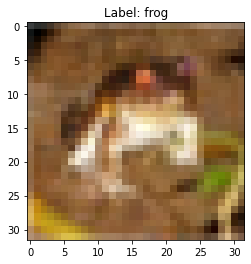

In [11]:
img = datas1[0].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[0]]}')

Text(0.5, 1.0, 'Label: truck')

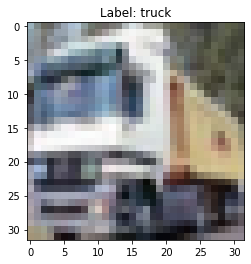

In [12]:
img = datas1[1].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[1]]}')

Text(0.5, 1.0, 'Label: deer')

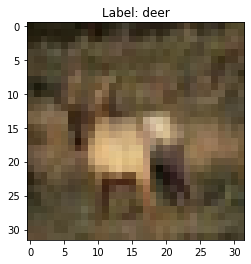

In [13]:
img = datas1[3].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[3]]}')

Text(0.5, 1.0, 'Label: automobile')

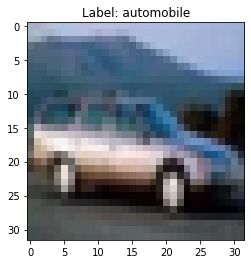

In [14]:
img = datas1[4].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[4]]}')

Text(0.5, 1.0, 'Label: bird')

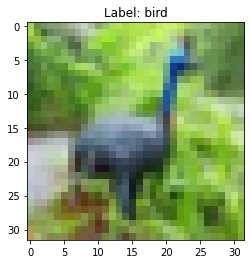

In [16]:
img = datas1[6].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[6]]}')

Text(0.5, 1.0, 'Label: airplane')

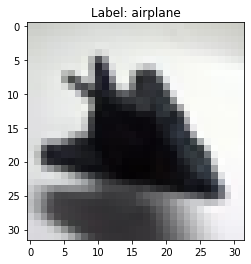

In [51]:
img = datas1[29].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[29]]}')

Text(0.5, 1.0, 'Label: ship')

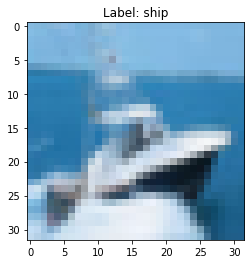

In [18]:
img = datas1[8].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[8]]}')

Text(0.5, 1.0, 'Label: horse')

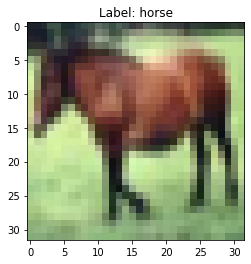

In [ ]:
img = datas1[7].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[7]]}')

Text(0.5, 1.0, 'Label: dog')

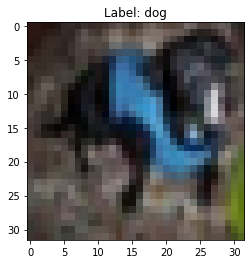

In [48]:
img = datas1[27].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[27]]}')

Text(0.5, 1.0, 'Label: cat')

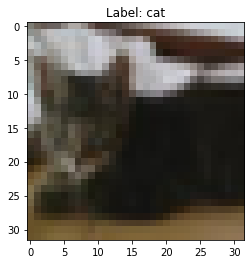

In [ ]:
img = datas1[9].reshape(3,32,32)
img = img.transpose(1,2,0)
plt.imshow(img)
plt.title(f'Label: {class_names_list[label1[9]]}')

## Model Definition

Pada bagian ini akan dibuat model dari neural network menggunakan metode pendenisian Sequential.

In [ ]:
model = Sequential([
        Conv2D(128, (3,3), input_shape=(32,32,3)),
        MaxPool2D(2),
        Conv2D(64, 3, activation='relu'),
        MaxPool2D(2),
        Conv2D(32, 3, activation='relu'),
        MaxPool2D(2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 32)        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6895 - accuracy: 0.3673 - val_loss: 1.4126 - val_accuracy: 0.4862
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3000 - accuracy: 0.5323 - val_loss: 1.2221 - val_accuracy: 0.5570
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1534 - accuracy: 0.5883 - val_loss: 1.1325 - val_accuracy: 0.5966
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0592 - accuracy: 0.6245 - val_loss: 1.0669 - val_accuracy: 0.6257
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9918 - accuracy: 0.6494 - val_loss: 1.0928 - val_accuracy: 0.6175
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9373 - accuracy: 0.6694 - val_loss: 0.9811 - val_accuracy: 0.6541
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8959 - accuracy: 0.6837 - val_loss: 1.0045 -

Base Model


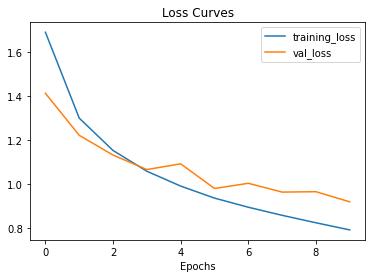

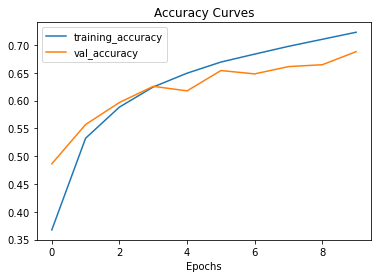

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

print("Base Model")
plot_loss_curves(history)

In [ ]:
print(classification_report(test_labels, np.argmax(model.predict(test_set), axis=1)))

              precision    recall  f1-score   support

           0       0.44      0.81      0.57      1000
           1       0.67      0.79      0.72      1000
           2       0.51      0.41      0.45      1000
           3       0.51      0.18      0.27      1000
           4       0.74      0.19      0.31      1000
           5       0.48      0.61      0.54      1000
           6       0.80      0.44      0.56      1000
           7       0.48      0.70      0.57      1000
           8       0.63      0.63      0.63      1000
           9       0.55      0.72      0.62      1000

    accuracy                           0.55     10000
   macro avg       0.58      0.55      0.52     10000
weighted avg       0.58      0.55      0.52     10000



<AxesSubplot:>

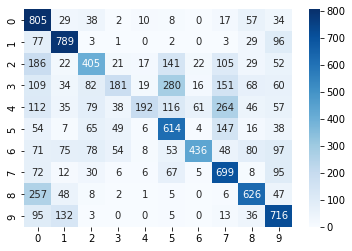

In [ ]:
sns.heatmap(confusion_matrix(test_labels, np.argmax(model.predict(test_set), axis=1)), annot=True, fmt='d', cmap='Blues')

Model ini menghasilkan akurasi yang termasuk rendah yaitu 0.55 pada test set. Recall dari model ini juga termasuk rendah dalam memprediksi, hal ini disebabkan karena model masih belum mampu menebak setiap label dengan tepat. Sedangkan dari grafik metric dapat diketahui model mengalami slight overfitting.

## Model Improvement

In [172]:
model_imp = Sequential([
        Conv2D(128, (3,3), input_shape=(32,32,3)),
        MaxPool2D(2),
        Conv2D(64, 3, activation='relu'),
        MaxPool2D(2),
        Conv2D(32, 3, activation='relu'),
        MaxPool2D(2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
])

model_imp.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)       

In [174]:
model_imp.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

history = model_imp.fit(train_data, 
            epochs=30, 
            validation_data=test_data)

Epoch 1/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1575 - accuracy: 0.5849 - val_loss: 1.1226 - val_accuracy: 0.5998
Epoch 2/30
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0513 - accuracy: 0.6265 - val_loss: 1.0438 - val_accuracy: 0.6290
Epoch 3/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9701 - accuracy: 0.6550 - val_loss: 1.0112 - val_accuracy: 0.6472
Epoch 4/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9060 - accuracy: 0.6813 - val_loss: 0.9743 - val_accuracy: 0.6579
Epoch 5/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8529 - accuracy: 0.6974 - val_loss: 0.9221 - val_accuracy: 0.6781
Epoch 6/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8152 - accuracy: 0.7135 - val_loss: 0.9284 - val_accuracy: 0.6757
Epoch 7/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7735 - accuracy: 0.7275 - val_loss: 0.9186 -

Base Model


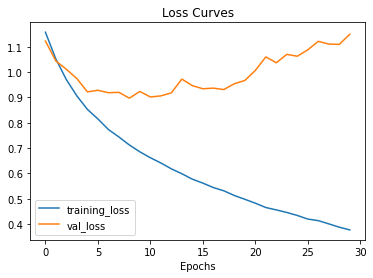

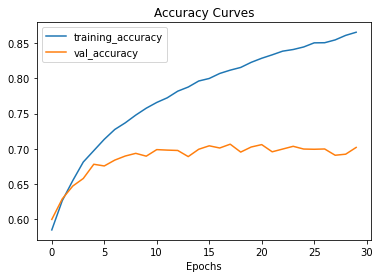

In [175]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

print("Base Model")
plot_loss_curves(history)

In [176]:
print(classification_report(test_labels, np.argmax(model_imp.predict(test_set), axis=1)))

              precision    recall  f1-score   support

           0       0.37      0.84      0.52      1000
           1       0.57      0.83      0.67      1000
           2       0.70      0.17      0.27      1000
           3       0.51      0.16      0.24      1000
           4       0.81      0.14      0.25      1000
           5       0.46      0.62      0.53      1000
           6       0.75      0.35      0.47      1000
           7       0.56      0.63      0.59      1000
           8       0.63      0.73      0.67      1000
           9       0.50      0.73      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.59      0.52      0.48     10000
weighted avg       0.59      0.52      0.48     10000



<AxesSubplot:>

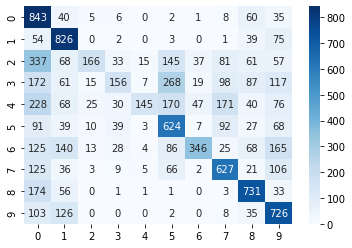

In [177]:
sns.heatmap(confusion_matrix(test_labels, np.argmax(model_imp.predict(test_set), axis=1)), annot=True, fmt='d', cmap='Blues')

Setelah melalui fase improvement model tidak mendapati penambahan pada akurasi melainkan mengalami penurunan akurasi. Akurasi model ini mencapai 0.52 pada test set dan recall dari model ini rendah dalam memprediksi, hal ini disebabkan karena model masih belum mampu menebak setiap label dengan tepat. Sedangkan dari grafik metric dapat diketahui model mengalami overfitting, ini ditandai saat training loss dari model turun melainkan validation lossnya naik.

## Model Testing (Data Inference)

### Inference Prediction

In [178]:
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize

def load_and_preprocess(filename, img_shape=32):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [179]:
new_img = load_and_preprocess('kapal2.jpeg')
new_img2 = load_and_preprocess('kapal3.jpg')
new_img.shape

TensorShape([32, 32, 3])

In [180]:
new_img2.shape

TensorShape([32, 32, 3])

In [181]:
from tensorflow import expand_dims
# benerin dimensi
new_img = expand_dims(new_img, axis=0)
new_img2 = expand_dims(new_img2, axis=0)
new_img.shape

TensorShape([1, 32, 32, 3])

In [182]:
res = model.predict(new_img)
res2 = model.predict(new_img2)
res.argmax()

8

In [183]:
res2.argmax()

8

In [184]:
model_imp.save('model_imp.h5')

from tensorflow.keras.models import load_model

savedModel=load_model('model_imp.h5')
savedModel.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)       

## Conclusion

Diketahui ada 60000 gambar berwarna 32x32 dalam 10 kelas, dengan 6000 gambar per kelas. Ada 50000 gambar pelatihan dan 10.000 gambar uji. Diketahui ada 10 kelas dalam dataset, dan berikut merupakan gambar dari setiap kelas:'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', dan 'truck'. Pada Model Evaluation sebelum improvement, Model tersebut menghasilkan akurasi yang termasuk rendah yaitu 0.55 pada test set. Recall dari model ini juga termasuk rendah dalam memprediksi, hal ini disebabkan karena model masih belum mampu menebak setiap label dengan tepat. Sedangkan dari grafik metric dapat diketahui model mengalami slight overfitting. Setelah melalui fase improvement model tidak mendapati penambahan pada akurasi melainkan mengalami penurunan akurasi. Akurasi model ini mencapai 0.52 pada test set dan recall dari model ini rendah dalam memprediksi, hal ini disebabkan karena model masih belum mampu menebak setiap label dengan tepat. Sedangkan dari grafik metric dapat diketahui model mengalami overfitting ini ditandai saat training loss dari model turun melainkan validation lossnya naik.